In [12]:
import sys
sys.executable
# sys.path
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
# !pip install pymysql
import pymysql
import plotly
from scipy import stats

In [13]:
conn = pymysql.connect(
    host="insight.cxqzkfwl6f4a.us-east-1.rds.amazonaws.com",
    port=int(3306),
    user="shoukydanindenic",
    passwd="54nuq5mi",
    db="insight",
    charset='utf8mb4')

sql = """
SELECT 	
	Date_Format(a.Create_DateTime,'%Y-%m-%d') as 'Date',
	count(*) as 'Count'
FROM alert a
WHERE a.Create_DateTime >= DATE_SUB(CURDATE(), INTERVAL 119 DAY)
	AND a.Rule_Name is not NULL
	AND a.Instance_UID in ('293a66ba-6ee1-4451-81d4-50bb6e2137e1')
GROUP BY 1
ORDER BY 1;
"""

# df = pd.read_sql_query(sql, parse_dates=['Date':'%Y-%m-%d'], conn)
df = pd.read_sql_query(sql, conn, parse_dates=['Date'])

In [14]:
print ("-- info --")
df.info()
print ("\n-- desc --")
desc = df.describe(include='all')
print(desc)
print ("-- ---- --")

-- info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
Date     90 non-null datetime64[ns]
Count    90 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB

-- desc --
                       Date      Count
count                    90  90.000000
unique                   90        NaN
top     2019-10-03 00:00:00        NaN
freq                      1        NaN
first   2019-08-20 00:00:00        NaN
last    2019-12-17 00:00:00        NaN
mean                    NaN   4.266667
std                     NaN   5.170791
min                     NaN   1.000000
25%                     NaN   1.000000
50%                     NaN   3.000000
75%                     NaN   5.000000
max                     NaN  32.000000
-- ---- --


In [15]:
df.set_index('Date',inplace=True)
print (">----")
print(len(df))
print (">>---")
print(df.tail(10))
print (">>>--")
print(df.index)
print (">>>>-")


>----
90
>>---
            Count
Date             
2019-12-05      1
2019-12-08      4
2019-12-09      2
2019-12-10      6
2019-12-12      2
2019-12-13      1
2019-12-14      4
2019-12-15     10
2019-12-16      3
2019-12-17      2
>>>--
DatetimeIndex(['2019-08-20', '2019-08-21', '2019-08-22', '2019-08-25',
               '2019-08-26', '2019-08-28', '2019-08-29', '2019-08-30',
               '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-07',
               '2019-09-08', '2019-09-09', '2019-09-10', '2019-09-12',
               '2019-09-13', '2019-09-15', '2019-09-16', '2019-09-18',
               '2019-09-19', '2019-09-21', '2019-09-22', '2019-09-23',
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-07', '2019-10-08', '2019-10-09',
               '2019-10-10', '2019-10-11', '2019-10-12', '2019-10-13',
               '2019-10-14', '2019-10-15', '2019-10-1

<Figure size 432x288 with 0 Axes>

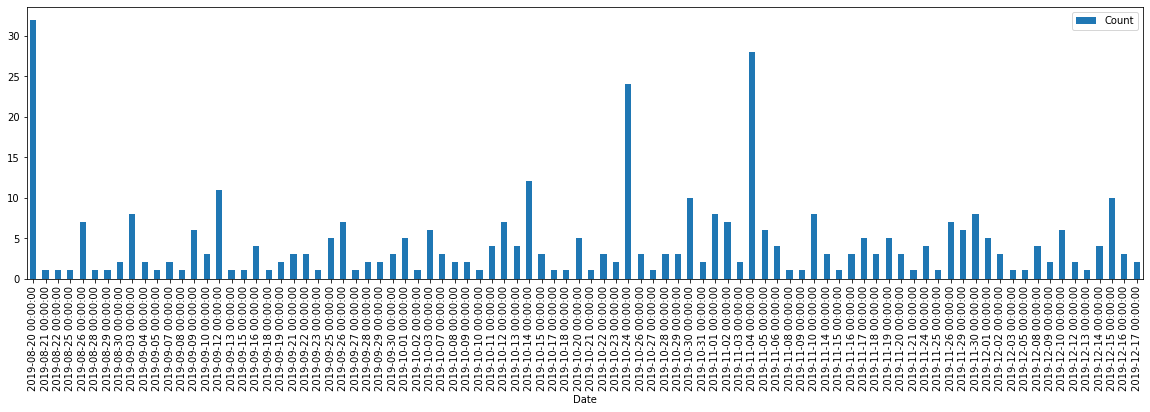

In [16]:
plt.figure()
df.plot(kind='bar',figsize=(20,5))

In [19]:
dt = pd.date_range(df.index[0],df.index[-1])
idx = pd.DatetimeIndex(dt)
df.reindex(idx,fill_value=0)
# print("= 1 =")
# print(df)
# print(df.asfreq('D',fill_value=0))


,Count
2019-08-20,32
2019-08-21,1
2019-08-22,1
2019-08-23,0
2019-08-24,0
...,...
2019-12-13,1
2019-12-14,4
2019-12-15,10
2019-12-16,3


In [20]:
dfa = df.asfreq('D')
dfa.fillna(0,inplace=True)
print("= 2 =")
print(dfa.index)
print(dfa)
print("= 3 =")


= 2 =
DatetimeIndex(['2019-08-20', '2019-08-21', '2019-08-22', '2019-08-23',
               '2019-08-24', '2019-08-25', '2019-08-26', '2019-08-27',
               '2019-08-28', '2019-08-29',
               ...
               '2019-12-08', '2019-12-09', '2019-12-10', '2019-12-11',
               '2019-12-12', '2019-12-13', '2019-12-14', '2019-12-15',
               '2019-12-16', '2019-12-17'],
              dtype='datetime64[ns]', name='Date', length=120, freq='D')
            Count
Date             
2019-08-20   32.0
2019-08-21    1.0
2019-08-22    1.0
2019-08-23    0.0
2019-08-24    0.0
...           ...
2019-12-13    1.0
2019-12-14    4.0
2019-12-15   10.0
2019-12-16    3.0
2019-12-17    2.0

[120 rows x 1 columns]
= 3 =


<Figure size 432x288 with 0 Axes>

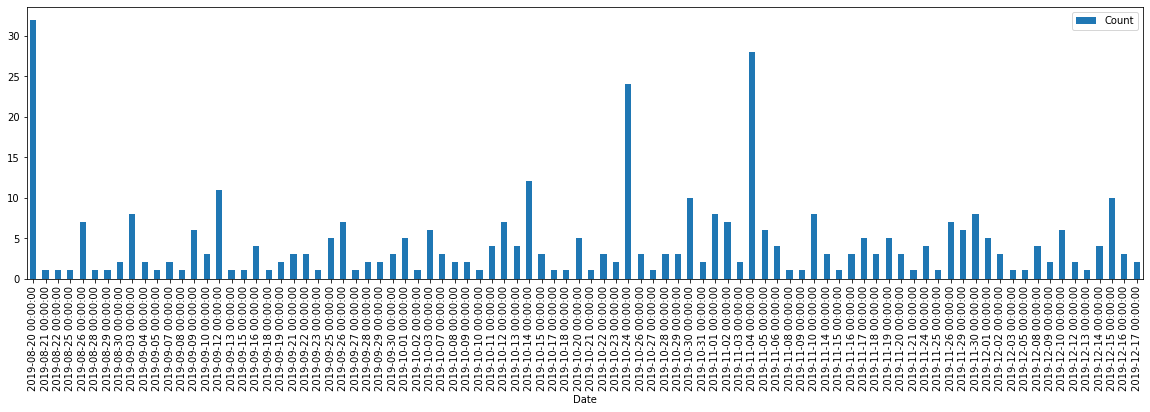

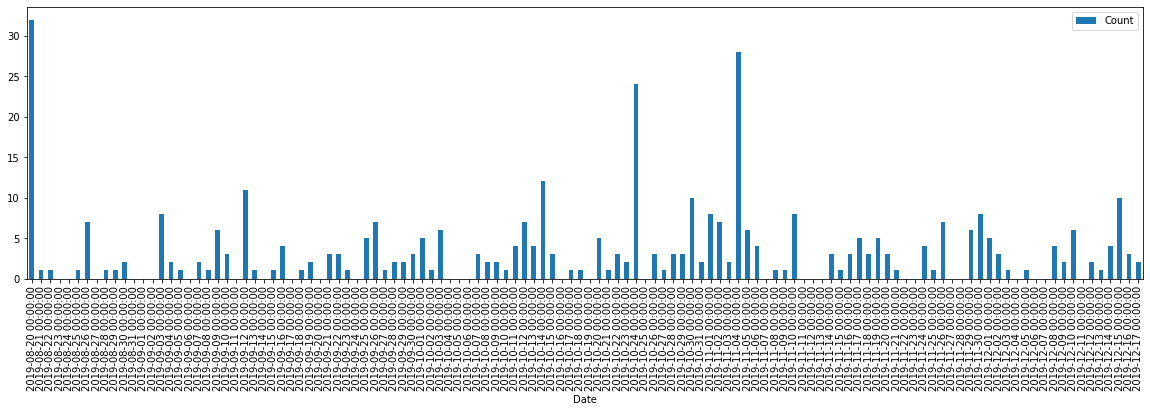

In [21]:
plt.figure()
df.plot(kind='bar',figsize=(20,5))
dfa.plot(kind='bar',figsize=(20,5))

# Test 
https://stackoverflow.com/questions/29091468/pandas-time-series-time-between-events

date_range = pd.date_range('2010-01-01', '2010-01-06')

df = pd.DataFrame([False, True, False, False, True, False], index=date_range, 

columns=['event'])

event_dates = df.index[df['event']]

df2 = pd.DataFrame(event_dates, index=event_dates, columns=['max_event_date'])

df = df.join(df2)

df['max_event_date'] = df['max_event_date'].cummax(axis=0, skipna=False)

df['days_since_event'] = df.index - df['max_event_date']

# here we check running "0"

In [23]:
  a=dfa
  # print(a)
  b=[0]*len(a)
  for i in range(len(a)):
      if a['Count'].iloc[i] == 0:
          b[i] = b[i-1] + 1
      else:
          b[i] = 0
  print ('this is the list of consecutive 0'.format(b) )
  # b=pd.Series(b) 
  print(b)
  dfa["0s"]= pd.Series(b, index=dfa.index)

dfa.head()


this is the list of consecutive 0
[0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


,Count,0s
Date,,
2019-08-20,32.0,0
2019-08-21,1.0,0
2019-08-22,1.0,0
2019-08-23,0.0,1
2019-08-24,0.0,2


# Now we check the AVG and STD for 4 consequetive numbers

In [28]:
dfa['avg_4'] = (dfa['0s'].rolling(4).mean())
dfa['std_4'] = (dfa['0s'].rolling(4).std())

In [30]:
dfa.head()

,Count,0s,avg_4,std_4
Date,,,,
2019-08-20,32.0,0,NaN,NaN
2019-08-21,1.0,0,NaN,NaN
2019-08-22,1.0,0,NaN,NaN
2019-08-23,0.0,1,0.25,0.500000
2019-08-24,0.0,2,0.75,0.957427


Max 0s {} 3


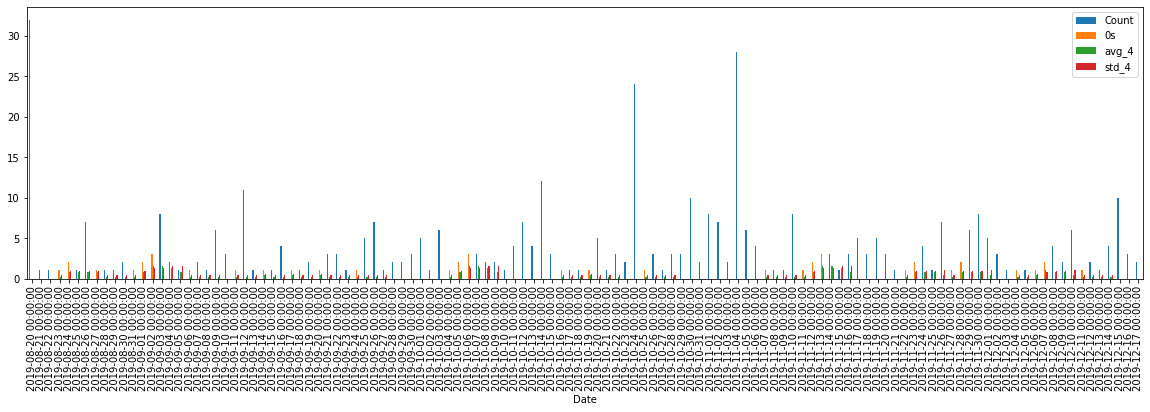

In [34]:
print("Max 0s {}",dfa["0s"].max())
dfa.plot(kind='bar',figsize=(20,5))




In [ ]:
# df_sd.info()
for c in col_list:
    df_sd[c+'res'] = (df_sd[c+"-0s"]>2) | (df_sd[c]<(df_sd[c+'-avg_4']-df_sd[c+'-std_4']))


In [ ]:
for c in col_list:
    print ("for the ", c , "check the following",df_sd[c+'res'][df_sd[c+'res']==True])

In [ ]:
for c in col_list:
    print(df_sd[c+'res'][df_sd[c+'res']==True])

In [ ]:
col_list=df_sd.columns
col_res=[c for c in col_list]

col_res[-number_of_costomers:]

In [ ]:
%matplotlib inline
final=df_sd[col_res[-number_of_costomers:]]


In [ ]:
# sns.set()

# fig, axes = plt.subplots(nrows=number_of_costomers,figsize=(30, 200))

# for j,i in enumerate(final.columns):
#   (final[i]*1).plot.bar(ax=axes[j],color='b',title= i,yticks=(0,1) );
#   axes[j].title.set_size(20);
  



# The drawing takes some time so be patient  👌🎈 

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(ax=ax, data=final[2:118], linecolor='lightgrey', linewidths=.01,cbar=False,annot=True,square =True) 

    

In [ ]:
#final.loc[2:100]
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(ax=ax, data=final[2:120].T, linecolor='lightgrey', linewidths=.01,cbar=False,annot=True,square =True) 